In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [4]:
from google.colab import drive
drive.mount('/content/drive')
ebola = pd.read_csv('/content/drive/MyDrive/country_timeseries.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN




---



##DataFrame.interpolate(self, method='linear', axis=0, limit=None, inplace=False, limit_direction='forward', limit_area=None, downcast=None, **kwargs)
- Parameters : method : str, default 'linear'
  - linear : 선형 방법으로 보간
  - time : 시간/날짜 간격으로 보간. 이때 시간/날짜가 index로 되어있어야 한다.
  - index, values : 
  - pad : 바로 앞에 value 사용
  - nearest, zero, slinear, quadratic, cubic, spline, barycentric, polynomial
  - krogh, piecewise_polynomial, spline, pchip, akima
- limitint, optional : 어느 값 이상으로는 채우지 않게 제한
- inplacebool, default False :가능하면 내가 쓰는 데이터 안에서 해결
- limit_direction{‘forward’, ‘backward’, ‘both’}, default ‘forward’ : limit을 사용했을 때, NAN 값 채워지는 방향
- limit_area{None, ‘inside’, ‘outside’}, default None : limit을 사용했을 때, 그 limit을 어디까지 제한할지
  - None: No fill restriction.
  - inside: Only fill NaNs surrounded by valid values (interpolate).
  - outside: Only fill NaNs outside valid values (extrapolate)
- downcast : optional, ‘infer’ or None, defaults to None
- Downcast dtypes if possible.


##보간법 종류 : 선형 보간법, newton 보간법, lagrange 보간법, spline 보간법



---



##fillna 함수를 통한 누락값 대체

In [24]:
#결측치 앞에 있는 값으로 대체
Guinea_1 = ebola.fillna(method="ffill")['Cases_Guinea']
#결측치 뒤에 있는 값으로 대체
Guinea_2 = ebola.fillna(method="bfill")['Cases_Guinea']
#결측치 평균값으로 대체
Guinea_3 = ebola.fillna(ebola['Cases_Guinea'].mean())['Cases_Guinea']

In [28]:
print('Guinea_1\n',Guinea_1)
print('Guinea_2\n',Guinea_2)
print('Guinea_3\n',Guinea_3)

Guinea_1
 0      2776.0
1      2775.0
2      2769.0
3      2769.0
4      2730.0
        ...  
117     103.0
118      86.0
119      86.0
120      86.0
121      49.0
Name: Cases_Guinea, Length: 122, dtype: float64
Guinea_2
 0      2776.0
1      2775.0
2      2769.0
3      2730.0
4      2730.0
        ...  
117     103.0
118      86.0
119      86.0
120      86.0
121      49.0
Name: Cases_Guinea, Length: 122, dtype: float64
Guinea_3
 0      2776.000000
1      2775.000000
2      2769.000000
3       911.064516
4      2730.000000
          ...     
117     103.000000
118      86.000000
119      86.000000
120      86.000000
121      49.000000
Name: Cases_Guinea, Length: 122, dtype: float64


In [14]:
print('Guinea_1 mean : ',Guinea_1.mean())
print('Guinea_2 mean : ',Guinea_2.mean())
print('Guinea_3 mean : ',Guinea_3.mean())

Guinea_1 mean :  1023.7295081967213
Guinea_2 mean :  1005.139344262295
Guinea_3 mean :  911.0645161290323


<Axes: >

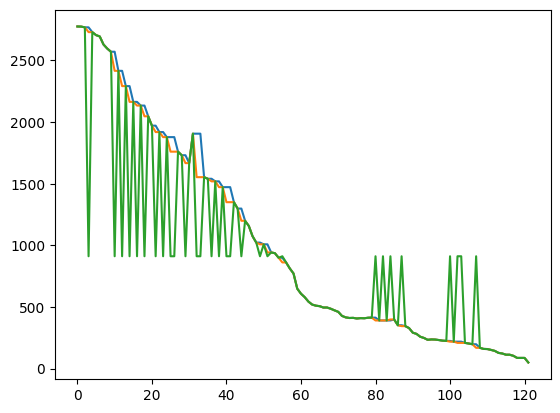

In [40]:
Guinea_1.plot()
Guinea_2.plot()
Guinea_3.plot()



---



<Axes: >

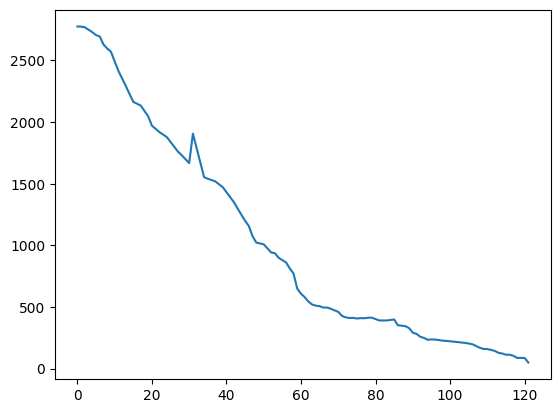

In [20]:
ebola.interpolate()['Cases_Guinea'].plot()

##선형 보간법 : interpolate(method='linear') 

<Axes: >

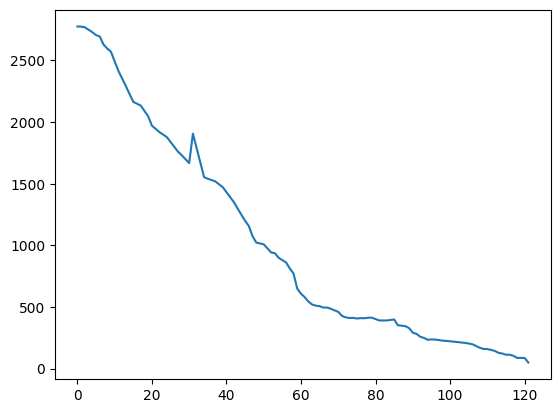

In [21]:
ebola.interpolate(method='linear')['Cases_Guinea'].plot()

In [17]:
ebola.interpolate(method='linear')['Cases_Guinea'].mean()

1014.4344262295082

##interpolate(method='values') : 인덱스의 실제 숫자 값을 사용

<Axes: >

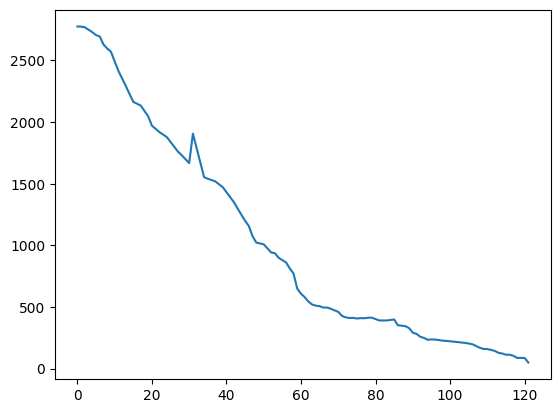

In [30]:
ebola.interpolate(method='values')['Cases_Guinea'].plot()

In [31]:
ebola.interpolate(method='values')['Cases_Guinea'].mean()

1014.4344262295082

##interpolate(method='pad') : 기존 값을 사용하여 NaN 채우기

<Axes: >

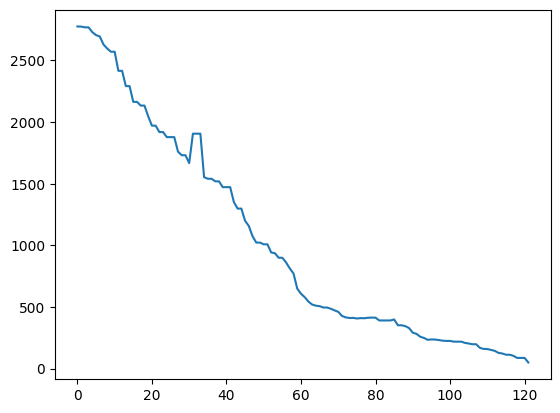

In [33]:
ebola.interpolate(method='pad')['Cases_Guinea'].plot()

In [34]:
ebola.interpolate(method='pad')['Cases_Guinea'].mean()

1023.7295081967213

##interpolate(method='nearest') : 가장 인접한 값을 보간하고자 하는 픽셀의 값으로 복사하거나 평균을 취하여 사용

<Axes: >

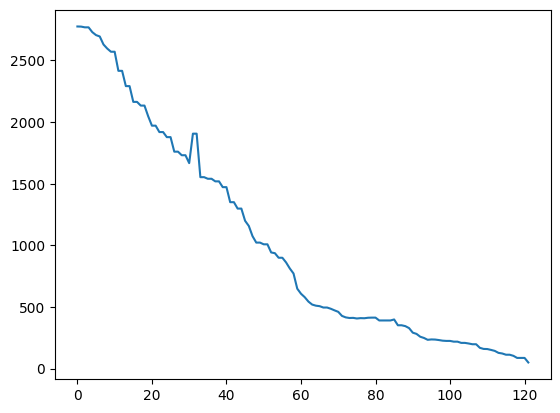

In [36]:
ebola.interpolate(method='nearest')['Cases_Guinea'].plot()

In [35]:
ebola.interpolate(method='nearest')['Cases_Guinea'].mean()

1018.7868852459017

##interpolate(method='polynomial') 

<Axes: >

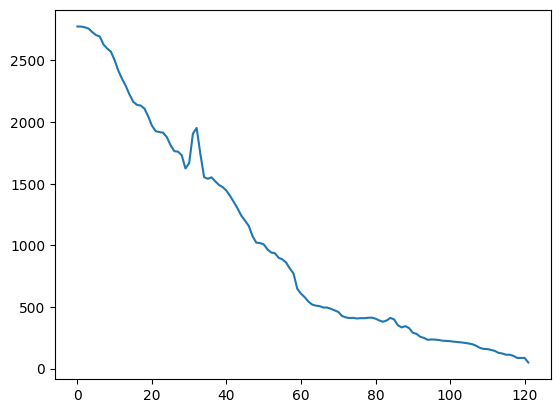

In [48]:
ebola.interpolate(method='polynomial', order=5)['Cases_Guinea'].plot()

In [49]:
ebola.interpolate(method='polynomial', order=5)['Cases_Guinea'].mean()

1015.6073687082232

##interpolate(method='spline') : 두 점 사이의 다항식을 만들고 구한 각각을 함수가 연속되게 이어주는 작업을 하는 방법

<Axes: >

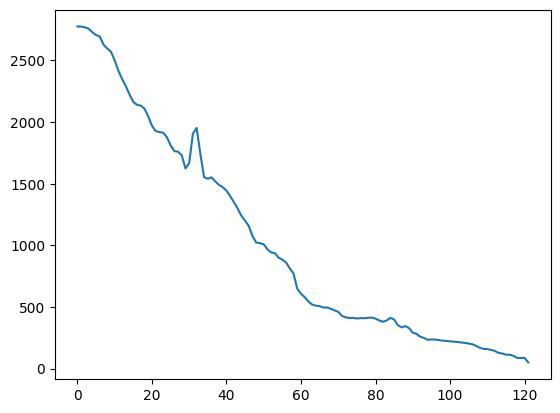

In [51]:
ebola.interpolate(method='spline',order=5)['Cases_Guinea'].plot()

In [52]:
ebola.interpolate(method='spline',order=5)['Cases_Guinea'].mean()

1015.5828119990994

##interpolate(method='quadratic') : 인덱스의 숫자 값 사용

<Axes: >

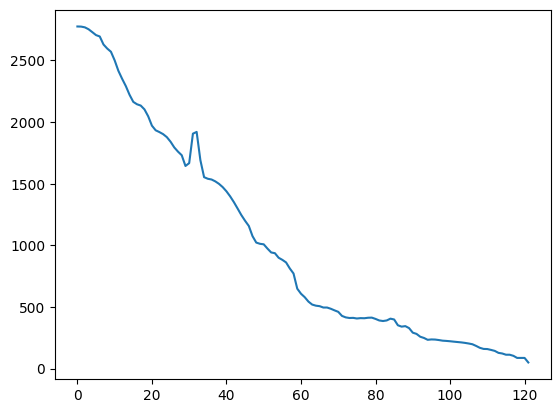

In [54]:
ebola.interpolate(method='quadratic')['Cases_Guinea'].plot()

In [55]:
ebola.interpolate(method='quadratic')['Cases_Guinea'].mean()

1015.3702769069504



---

